In [3]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller 
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator


In [14]:
df=pd.read_csv("Delhi.csv")
df["date"]=pd.to_datetime(df["date"])
df.set_index("date", inplace=True)

# testing for stationarity of the data
adful_test=adfuller(df["meantemp"])
# adful_test

df1=df.iloc[:,:1]
# df["meantemp"].plot()
train=df1.iloc[:100]
test=df1.iloc[100:]
df2=test.copy()

scaler=MinMaxScaler()
scaler.fit(train)

scaler_train=scaler.transform(train)
scaler_test=scaler.transform(test)

num_input=5
num_feature=1

generator=TimeseriesGenerator(scaler_train,scaler_train,length=num_input,batch_size=2)

X,Y=generator[0]

X


array([[[0.24113097],
        [0.36809816],
        [0.29993183],
        [0.37791411],
        [0.36264485]],

       [[0.36809816],
        [0.29993183],
        [0.37791411],
        [0.36264485],
        [0.40825432]]])

In [23]:
from keras.models import Sequential
from keras.layers import Dense,LSTM
import tensorflow as tf

# defining the model
model=Sequential()
model.add(LSTM(10, activation="relu", input_shape=(num_input,num_feature),return_sequences=True))
model.add(LSTM(20,activation="relu"),)
model.add(Dense(1))
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001),loss=tf.losses.MeanSquaredError())
model.fit(generator,epochs=50)



Epoch 1/50
43/43 [==============================] - 1s 15ms/step - loss: 0.2629
Epoch 2/50
43/43 [==============================] - 1s 13ms/step - loss: 0.2392
Epoch 3/50
43/43 [==============================] - 1s 13ms/step - loss: 0.2155
Epoch 4/50
43/43 [==============================] - 1s 13ms/step - loss: 0.1910
Epoch 5/50
43/43 [==============================] - 1s 13ms/step - loss: 0.1656
Epoch 6/50
43/43 [==============================] - 1s 13ms/step - loss: 0.1390
Epoch 7/50
43/43 [==============================] - 1s 13ms/step - loss: 0.1132
Epoch 8/50
43/43 [==============================] - 1s 14ms/step - loss: 0.0879
Epoch 9/50
43/43 [==============================] - 1s 16ms/step - loss: 0.0643
Epoch 10/50
43/43 [==============================] - 1s 13ms/step - loss: 0.0452
Epoch 11/50
43/43 [==============================] - 1s 14ms/step - loss: 0.0328
Epoch 12/50
43/43 [==============================] - 1s 17ms/step - loss: 0.0266
Epoch 13/50
43/43 [==================

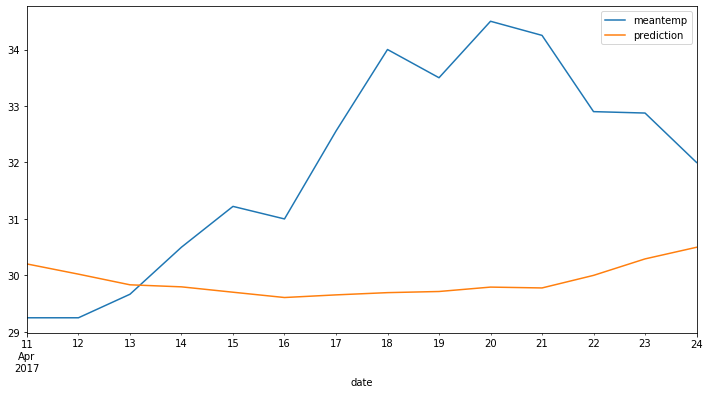

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# viewing loss
# loss_per_epoch=model.history.history["loss"]
# plt.figure(figsize=(6,4))
# # plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

# testing the data
last_train=scaler_train[-14:]
last_train=last_train.reshape((1,num_input,num_feature))

prediction=model.predict(last_train)

pred_train=[]

for x in range(len(scaler_test)):
    prediction=model.predict(last_train).flatten()
    pred_train.append(prediction)

    #   use prediction to update last_train
    last_train=np.append(last_train[:,1:,:],[[prediction]],axis=1)
# prediction,scaler_test[0]

pred_train=scaler.inverse_transform(pred_train)
df2["prediction"]= pred_train

# finding the error of the model
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(df2["meantemp"],df2["prediction"]))
# print(rmse)

df2.plot(figsize=(12,6))

